In [137]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
import numpy as np

In [158]:
dataframe = pd.read_csv("PruebaH6.csv")
dataframe.head()

,id,price,availability_365
0,1,160,283
1,2,350,343
2,3,50,60
3,4,95,365
4,5,50,351


In [159]:
price = dataframe['price'].values
availability_365 = dataframe['availability_365'].values
ids = list(dataframe.index)
lista=[]
priceInt = []
print(type(price[20]))

"""

for i in range(0,len(price)):
    lista.append(price[i])
    priceInt.append(int(lista[i]))
    
"""
price = price.astype(np.int)
availability_365 = availability_365.astype(np.int)
print(type(price[20]))
print(type(availability_365[20]))






<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'numpy.int32'>


In [160]:
Data = { 'y' : availability_365, 'x' : price}
df = DataFrame(Data,columns=['x','y'])
df

,x,y
0,160,283
1,350,343
2,50,60
3,95,365
4,50,351
...,...,...
3706,135,326
3707,79,332
3708,275,317
3709,179,150


In [161]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

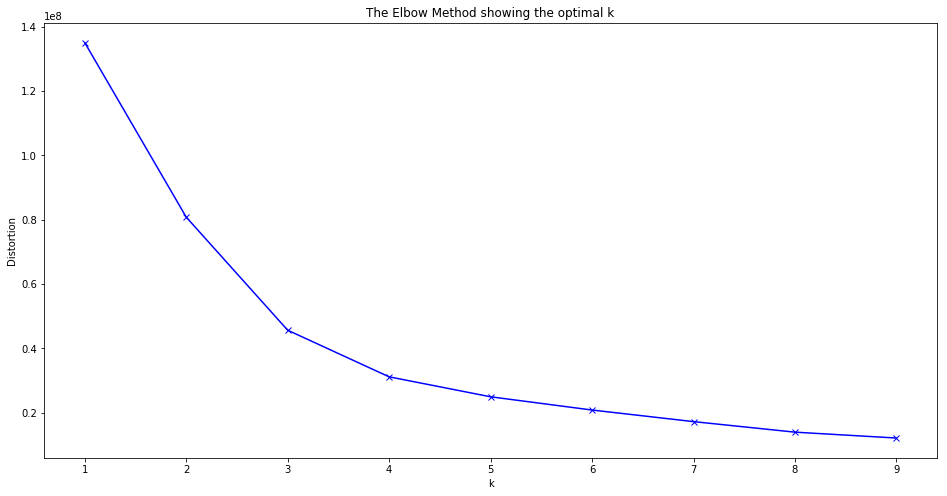

In [162]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [166]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [167]:
centroids = kmeanModel.cluster_centers_
print(centroids)

[[ 120.91491308  323.92863678]
 [ 120.18755119   71.31367731]
 [1352.04347826  174.73913043]
 [ 397.86120996  269.80782918]]


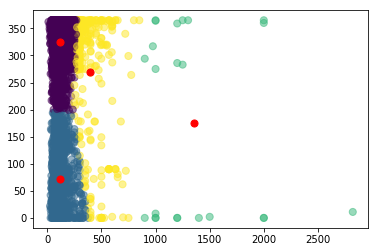

In [168]:
plt.scatter(df['x'], df['y'], c= kmeanModel.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [169]:
cluster = kmeanModel.labels_

In [173]:
dataCluster = {'ids': ids, 'price' : price, 'availability_365' : availability_365, 'cluster' : cluster }
dfCluster = DataFrame(dataCluster,columns=[ 'ids','price','availability_365','cluster'] )
dfCluster

,ids,price,availability_365,cluster
0,0,160,283,0
1,1,350,343,3
2,2,50,60,1
3,3,95,365,0
4,4,50,351,0
...,...,...,...,...
3706,3706,135,326,0
3707,3707,79,332,0
3708,3708,275,317,3
3709,3709,179,150,1
